## Generating randomized parameter sets

In [1]:
# Import all packages/functions here 

from biocrnpyler import *
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

import pandas as pd
import numpy as np
from Parameters import Parameters 
from RunModel import run_CRN_model
from numpy.random import RandomState

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [2]:
# Load the model and define the simulation timepoints 

model_degtag = Model(sbml_filename = 'BioCRNpyler_model_degtag_070824.xml')
model_no_tag = Model(sbml_filename = 'BioCRNpyler_model_no_degtag_070824.xml')

N_steps = 1000
t_final = 1000
timepoints = np.linspace(0, t_final, N_steps)

tf_I = 720  # Index of last time point we want to observe (720 minutes) 

In [3]:
# Load the parameter file 
p = pd.read_csv('model_param_file_070824.csv').to_numpy()
p = p[:,2]

params = Parameters() # Create the parameter object params


params.add_parameter(name = 'k_RNAP', value = p[0]*1, min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)
params.add_parameter(name = 'k_Ribo', value = p[1]*1, min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)
params.add_parameter(name = 'k_tRNA', value = p[2]*1 , min_bound = 0.014*0.3*0, max_bound = 0.015*3.33)
params.add_parameter(name = 'k_Et', value = p[3]*1, min_bound = 0.014*0.33*0, max_bound = 0.021)
params.add_parameter(name = 'k_protease', value = p[4]*1, min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)

params.add_parameter(name = "Sigma_IC", value = p[5]*1, min_bound = 150, max_bound = 1000)
params.add_parameter(name = "RNAP_IC", value = p[6]*1, min_bound = 200, max_bound = 1000)
params.add_parameter(name = "NT_IC", value = p[7]*1, min_bound = 10, max_bound = 1000)
params.add_parameter(name = "RNAase_IC", value = p[8]*1, min_bound = 10, max_bound = 1000)
params.add_parameter(name = "Et_IC", value = p[9]*1, min_bound = 250, max_bound = 600)
params.add_parameter(name = "AA_IC", value = p[10]*1, min_bound = 300, max_bound = 50000)
params.add_parameter(name = "tRNA_IC", value = p[11]*1, min_bound = 155, max_bound = 900)
params.add_parameter(name = "Ribo_IC", value = p[12]*1, min_bound = 250, max_bound = 900)
params.add_parameter(name = "protease_IC", value = p[13]*1, min_bound = 250, max_bound = 900)

params.add_parameter(name = "Ribo_min", value = p[14]*1, min_bound = 100, max_bound = 250)
params.add_parameter(name = "tRNA_min", value = p[15]*1, min_bound = 100, max_bound = 155)
params.add_parameter(name = "RNAP_min", value = p[16]*1, min_bound = 100, max_bound = 200)
params.add_parameter(name = "Et_min", value = p[17]*1, min_bound = 100, max_bound = 250)
params.add_parameter(name = "protease_min", value = p[18]*1, min_bound = 100, max_bound = 250)

k_tx_1b = 0.0371*1
k_tx_2u = 0.097*2

params.add_parameter(name = 'k_tx_1b', value = p[19]*1, min_bound = 1*1e-3, max_bound = 1*1e-1)
params.add_parameter(name = 'k_tx_1u', value = p[20], min_bound = k_tx_1b*100, max_bound = k_tx_1b*1000)
params.add_parameter(name = 'k_tx_2b', value = p[21]*1 , min_bound = k_tx_2u/1000, max_bound= k_tx_2u/100)
params.add_parameter(name = 'k_tx_2u', value = p[22]*1, min_bound = 0.01, max_bound = 0.1)
params.add_parameter(name = 'k_tx_3', value = p[23]*1, min_bound = 0.001, max_bound = 0.0036)
params.add_parameter(name = 'k_tx_4b', value = p[24], min_bound = 0.1, max_bound = 5)
params.add_parameter(name = 'k_tx_4u', value = p[25]*1, min_bound = 100, max_bound = 200)
params.add_parameter(name = 'k_tx_5', value = p[26]*1, min_bound = 0.1, max_bound = 10)

params.add_parameter(name = 'k_tl_1b', value = p[27], min_bound = 0.03*0.33, max_bound = 0.3*3.33)
params.add_parameter(name = 'k_tl_1u', value = p[28], min_bound = 2.1e4*0.33, max_bound = 2.1e4*3.33)
params.add_parameter(name = 'k_tl_2', value = p[29], min_bound = 1.2e+04*0.33, max_bound = 1.2e+04*3.33)
params.add_parameter(name = 'k_tl_3', value = p[30], min_bound = 3*0.33, max_bound = 3*3.33)
params.add_parameter(name = 'k_tl_4', value = p[31], min_bound = 8.22e+02*0.33, max_bound = 8.22e+02*3.33)
params.add_parameter(name = 'k_tl_5', value = p[32], min_bound = 101.1*0.33, max_bound = 101.1*3.33)
params.add_parameter(name = 'k_tl_6b', value = p[33]*1, min_bound = 1.8e-3*0.33, max_bound = 1.8e-3*3.33)
params.add_parameter(name = 'k_tl_6u', value = p[34]*1, min_bound = 6.0e+02*0.33, max_bound = 6.0e+02*3.33)
params.add_parameter(name = 'k_tl_7', value = p[35]*1, min_bound = 1.6, max_bound = 4.25)
params.add_parameter(name = 'k_tl_8', value = p[36]*1, min_bound = 0.1, max_bound = 0.2)
params.add_parameter(name = "b_tl_8", value = p[37]*1, min_bound = 0.5, max_bound = 1)
params.add_parameter(name = 'k_tl_9', value = p[38]*1, min_bound = 0.05, max_bound = 10)
params.add_parameter(name = 'b_tl_7', value = p[39]*1, min_bound = 0.4, max_bound = 1.5)
params.add_parameter(name = 'k_tl_10', value = p[40]*1, min_bound = 0.0005, max_bound = 0.01)
params.add_parameter(name = 'k_tl_11', value = p[41]*1, min_bound = 0.0005, max_bound = 0.1)
params.add_parameter(name = 'k_tl_12', value = p[42]*1, min_bound = 10, max_bound = 1e3)
params.add_parameter(name = 'k_tl_13b', value = p[43]*1, min_bound = 0.1, max_bound = 10)
params.add_parameter(name = 'k_tl_13u', value = p[44]*1, min_bound = 50, max_bound = 100000)
params.add_parameter(name = 'P_max', value = p[45]*1, min_bound = 1e3, max_bound = 1e6)

params.add_parameter(name = 'C_max', value = p[46])
params.add_parameter(name = "C_0", value = p[47])
params.add_parameter(name = "k_gr", value = p[48])


sol_deg, sol_no_deg = run_CRN_model(params, model_degtag, model_no_tag, timepoints)


/Users/harikrishnan/.local/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


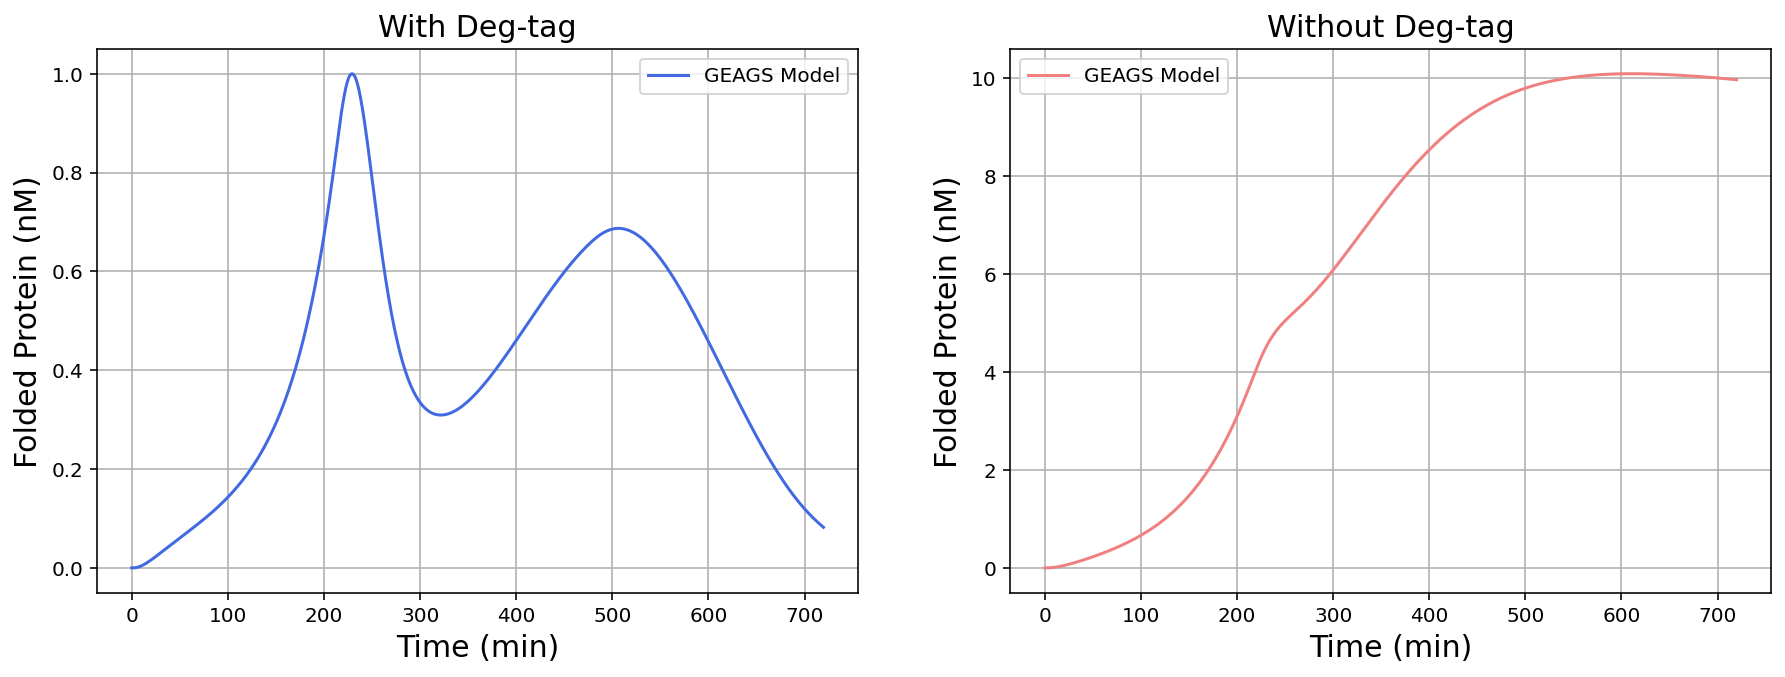

In [4]:
## Plot protein profile for checking the parameters 

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.1)

last_ind = -1
i = 0
ax[i].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'royalblue')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('With Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()

i = 1
ax[i].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'lightcoral')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('Without Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()


### Generating an array of parameters that we want to randomize

In [5]:
to_be_rand_params_array = np.zeros(len(p))
to_be_rand_params_array[:] = p

Generating array of random parameters (for IC)

In [6]:
N = 1000 # Number of sets of parameters we want
Np = len(to_be_rand_params_array) # Number of parameters we have 
parameter_set_IC = np.zeros((Np,N))
interval = 0.1 # Means the interval about parameter which we want uniform distribution. 0.15 means [p - 0.15*p, p + p*0.15)

# To ensure same set of random numbers are produced 
rand = RandomState(123)

for i in range(Np):
    P = to_be_rand_params_array[i]
    
    ## generating a uniform distribution about the parameters we want to analyze closely 

    if i in range(0,19):# or i in range(46,49): 
        # This if statement filters out the parameters we want to keep constant 
        interval_new =  0
        low_P = P * (1 - interval_new)
        high_P = P * (1 + interval_new)
        set_P = rand.uniform(low = low_P, high = high_P, size = (1,N))
        parameter_set_IC[i,:] = set_P
    
    else:
        low_P = P * (1 - interval)
        high_P = P * (1 + interval)
        set_P = rand.uniform(low = low_P, high = high_P, size = (1,N))
        parameter_set_IC[i,:] = set_P

np.shape(parameter_set_IC)

(49, 1000)

In [7]:
# Visualize random initialization 

random_IC_sol_deg = np.zeros((N, N_steps))
random_IC_sol_no_deg = np.zeros((N, N_steps))

for i in range(N): 

    rand_params = Parameters() # Parameters to be randomized 


    rand_params.add_parameter(name = 'k_RNAP', value = parameter_set_IC[0,i]*1, min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)
    rand_params.add_parameter(name = 'k_Ribo', value = parameter_set_IC[1,i], min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)
    rand_params.add_parameter(name = 'k_tRNA', value = parameter_set_IC[2,i] , min_bound = 0.014*0.3*0, max_bound = 0.015*3.33)
    rand_params.add_parameter(name = 'k_Et', value = parameter_set_IC[3,i], min_bound = 0.014*0.33*0, max_bound = 0.021)
    rand_params.add_parameter(name = 'k_protease', value = parameter_set_IC[4,i], min_bound = 0.014*0.33*0, max_bound = 0.015*3.33)

    rand_params.add_parameter(name = "Sigma_IC", value = parameter_set_IC[5,i], min_bound = 150, max_bound = 1000)
    rand_params.add_parameter(name = "RNAP_IC", value = parameter_set_IC[6,i], min_bound = 200, max_bound = 1000)
    rand_params.add_parameter(name = "NT_IC", value = parameter_set_IC[7,i], min_bound = 10, max_bound = 1000)
    rand_params.add_parameter(name = "RNAase_IC", value = parameter_set_IC[8,i], min_bound = 10, max_bound = 1000)
    rand_params.add_parameter(name = "Et_IC", value = parameter_set_IC[9,i], min_bound = 250, max_bound = 600)
    rand_params.add_parameter(name = "AA_IC", value = parameter_set_IC[10,i], min_bound = 300, max_bound = 50000)
    rand_params.add_parameter(name = "tRNA_IC", value = parameter_set_IC[11,i], min_bound = 155, max_bound = 900)
    rand_params.add_parameter(name = "Ribo_IC", value = parameter_set_IC[12,i], min_bound = 250, max_bound = 900)
    rand_params.add_parameter(name = "protease_IC", value = parameter_set_IC[13,i], min_bound = 250, max_bound = 900)

    rand_params.add_parameter(name = "Ribo_min", value = parameter_set_IC[14,i], min_bound = 100, max_bound = 250)
    rand_params.add_parameter(name = "tRNA_min", value = parameter_set_IC[15,i], min_bound = 100, max_bound = 155)
    rand_params.add_parameter(name = "RNAP_min", value = parameter_set_IC[16,i], min_bound = 100, max_bound = 200)
    rand_params.add_parameter(name = "Et_min", value = parameter_set_IC[17,i], min_bound = 100, max_bound = 250)
    rand_params.add_parameter(name = "protease_min", value = parameter_set_IC[18,i], min_bound = 100, max_bound = 250)

    k_tx_1b = 0.0371*1
    k_tx_2u = 0.097*2

    rand_params.add_parameter(name = 'k_tx_1b', value = parameter_set_IC[19,i], min_bound = 1*1e-3, max_bound = 1*1e-1)
    rand_params.add_parameter(name = 'k_tx_1u', value = parameter_set_IC[20,i], min_bound = k_tx_1b*100, max_bound = k_tx_1b*1000)
    rand_params.add_parameter(name = 'k_tx_2b', value = parameter_set_IC[21,i] , min_bound = k_tx_2u/1000, max_bound= k_tx_2u/100)
    rand_params.add_parameter(name = 'k_tx_2u', value = parameter_set_IC[22,i], min_bound = 0.01, max_bound = 0.1)
    rand_params.add_parameter(name = 'k_tx_3', value = parameter_set_IC[23,i], min_bound = 0.001, max_bound = 0.0036)
    rand_params.add_parameter(name = 'k_tx_4b', value = parameter_set_IC[24,i], min_bound = 0.1, max_bound = 5)
    rand_params.add_parameter(name = 'k_tx_4u', value = parameter_set_IC[25,i], min_bound = 100, max_bound = 200)
    rand_params.add_parameter(name = 'k_tx_5', value = parameter_set_IC[26,i], min_bound = 0.1, max_bound = 10)

    rand_params.add_parameter(name = 'k_tl_1b', value = parameter_set_IC[27,i], min_bound = 0.03*0.33, max_bound = 0.3*3.33)
    rand_params.add_parameter(name = 'k_tl_1u', value = parameter_set_IC[28,i], min_bound = 2.1e4*0.33, max_bound = 2.1e4*3.33)
    rand_params.add_parameter(name = 'k_tl_2', value = parameter_set_IC[29,i], min_bound = 1.2e+04*0.33, max_bound = 1.2e+04*3.33)
    rand_params.add_parameter(name = 'k_tl_3', value = parameter_set_IC[30,i], min_bound = 3*0.33, max_bound = 3*3.33)
    rand_params.add_parameter(name = 'k_tl_4', value = parameter_set_IC[31,i], min_bound = 8.22e+02*0.33, max_bound = 8.22e+02*3.33)
    rand_params.add_parameter(name = 'k_tl_5', value = parameter_set_IC[32,i], min_bound = 101.1*0.33, max_bound = 101.1*3.33)
    rand_params.add_parameter(name = 'k_tl_6b', value = parameter_set_IC[33,i], min_bound = 1.8e-3*0.33, max_bound = 1.8e-3*3.33)
    rand_params.add_parameter(name = 'k_tl_6u', value = parameter_set_IC[34,i], min_bound = 6.0e+02*0.33, max_bound = 6.0e+02*3.33)
    rand_params.add_parameter(name = 'k_tl_7', value = parameter_set_IC[35,i], min_bound = 1.6, max_bound = 4.25)
    rand_params.add_parameter(name = 'k_tl_8', value = parameter_set_IC[36,i], min_bound = 0.1, max_bound = 0.2)
    rand_params.add_parameter(name = "b_tl_8", value = parameter_set_IC[37,i], min_bound = 0.5, max_bound = 1)
    rand_params.add_parameter(name = 'k_tl_9', value = parameter_set_IC[38,i], min_bound = 0.05, max_bound = 10)
    rand_params.add_parameter(name = 'b_tl_7', value = parameter_set_IC[39,i], min_bound = 0.4, max_bound = 1.5)
    rand_params.add_parameter(name = 'k_tl_10', value = parameter_set_IC[40,i], min_bound = 0.0005, max_bound = 0.01)
    rand_params.add_parameter(name = 'k_tl_11', value = parameter_set_IC[41,i], min_bound = 0.0005, max_bound = 0.1)
    rand_params.add_parameter(name = 'k_tl_12', value = parameter_set_IC[42,i], min_bound = 10, max_bound = 1e3)
    rand_params.add_parameter(name = 'k_tl_13b', value = parameter_set_IC[43,i], min_bound = 0.1, max_bound = 10)
    rand_params.add_parameter(name = 'k_tl_13u', value = parameter_set_IC[44,i], min_bound = 50, max_bound = 100000)
    rand_params.add_parameter(name = 'P_max', value = parameter_set_IC[45,i], min_bound = 1e3, max_bound = 1e6)

    rand_params.add_parameter(name = 'C_max', value = parameter_set_IC[46,i])
    rand_params.add_parameter(name = "C_0", value = parameter_set_IC[47,i])
    rand_params.add_parameter(name = "k_gr", value = parameter_set_IC[48,i])

    sol_deg_rand, sol_no_deg_rand = run_CRN_model(rand_params, model_degtag, model_no_tag, timepoints)

    random_IC_sol_deg[i,:] = sol_deg_rand['protein_X']
    random_IC_sol_no_deg[i,:] = sol_no_deg_rand['protein_X']

/Users/harikrishnan/.local/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


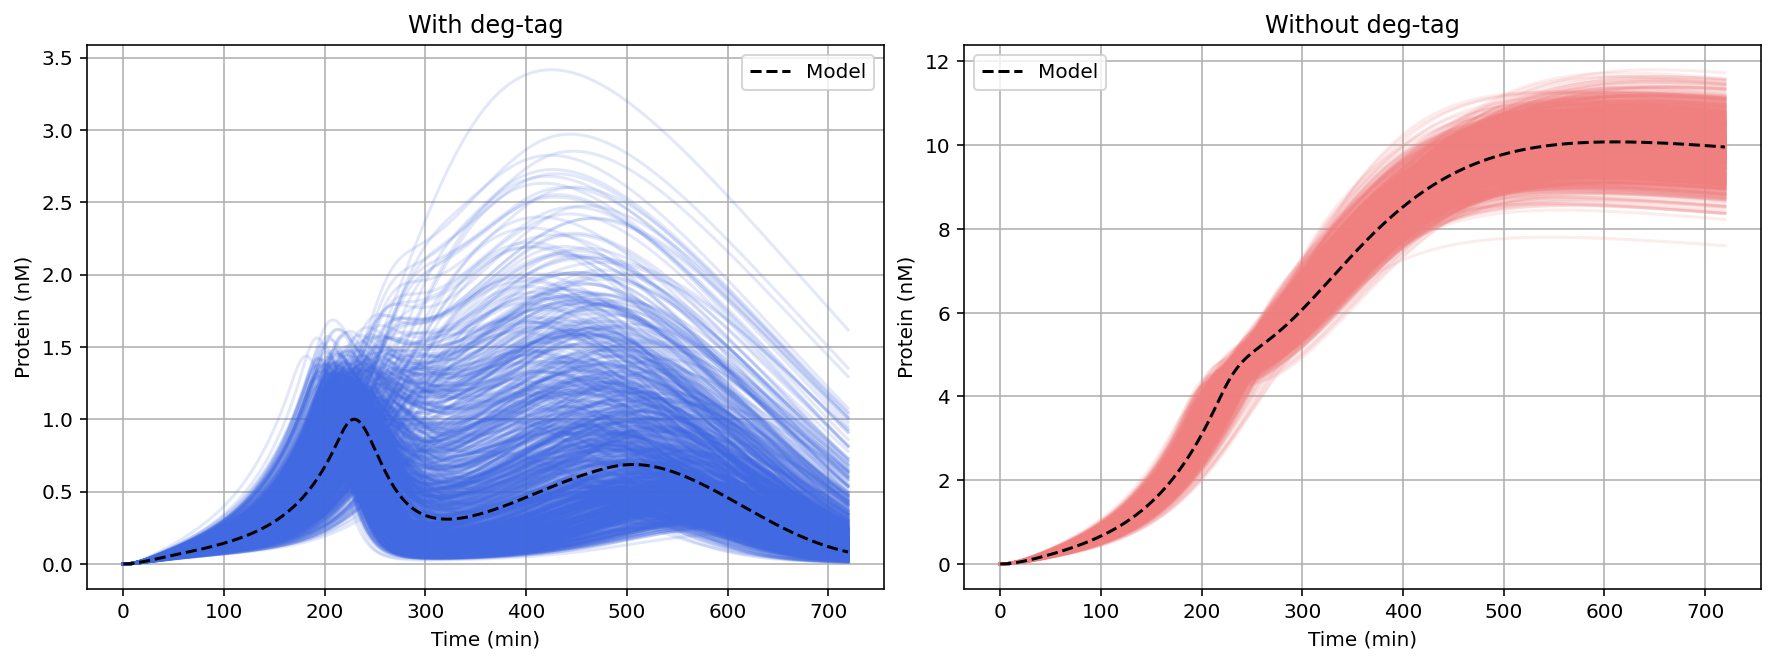

In [8]:
fig,ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

# Create a colormap to generate a sequence of distinct colors
colormap = plt.cm.get_cmap('jet', N)
alpha = 0.15
for i in range(N): 

    ax[0].plot(timepoints[:tf_I], random_IC_sol_deg[i, :][:tf_I]/np.max(sol_deg['protein_X']), color = 'royalblue', alpha = alpha)
    
    ax[0].set_xlabel('Time (min)') ; ax[0].set_ylabel('Protein (nM)') ; 
    ax[0].set_title('With deg-tag')
    ax[0].grid(True) ; 

    ax[1].plot(timepoints[:tf_I], random_IC_sol_no_deg[i, :][:tf_I]/np.max(sol_deg['protein_X']), color = 'lightcoral', alpha = alpha)
    ax[1].set_xlabel('Time (min)') ; ax[1].set_ylabel('Protein (nM)') ; 
    
    ax[1].set_title('Without deg-tag')
    ax[1].grid(True) ; 


ax[0].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'Model')
ax[0].legend()


ax[1].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'Model')
ax[1].legend()

ax[0].grid(True)
ax[1].grid(True)

In [9]:
# param_array = parameter_set_IC
# param_data = pd.DataFrame(param_array)
# param_data.to_csv("random_parameter_1000_sets_081324_IC_constant.csv")